In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv'    
flights = pd.read_csv(url, sep = ',')
flights.head(10)

,Unnamed: 0,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,1,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,3,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,4,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,5,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
5,6,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0
6,7,2013,1,1,555.0,-5.0,913.0,19.0,B6,N516JB,507,EWR,FLL,158.0,1065,5.0,55.0
7,8,2013,1,1,557.0,-3.0,709.0,-14.0,EV,N829AS,5708,LGA,IAD,53.0,229,5.0,57.0
8,9,2013,1,1,557.0,-3.0,838.0,-8.0,B6,N593JB,79,JFK,MCO,140.0,944,5.0,57.0
9,10,2013,1,1,558.0,-2.0,753.0,8.0,AA,N3ALAA,301,LGA,ORD,138.0,733,5.0,58.0


In [4]:
url = 'https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv'
weather = pd.read_csv(url, sep = ',')
weather = weather.drop(columns = "year").drop(columns = "origin").drop(columns = "Unnamed: 0")
weather.head(8)

,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0
5,1.0,1.0,6.0,39.02,26.06,59.37,270.0,10.35702,11.918651,0.0,1012.0,10.0
6,1.0,1.0,7.0,39.02,26.96,61.63,250.0,8.05546,9.270062,0.0,1012.3,10.0
7,1.0,1.0,8.0,39.02,28.04,64.43,240.0,11.50780,13.242946,0.0,1012.5,10.0


In [12]:
# counting the total quantity of delayed flights and the average delay time per every day-hour

flights_delayed = flights[(flights.dep_delay > 0)] 
flights_mean_delay = flights_delayed.groupby([flights_delayed.month, flights_delayed.day, flights_delayed.hour])['dep_delay'].agg([np.size, np.mean]).reset_index().rename(columns = {'size': 'counts', 'mean': 'average_delay_time'})
#flights_mean_delay_all = flights.groupby([flights.month, flights.day, flights.hour])['dep_delay'].agg([np.size, np.mean]).reset_index().rename(columns={'size': 'count', 'mean': 'average_delay_time'})

#merging weather and flights_mean_delay dataframes due to date-hour in order to discover the dependence of dep_delays on weather conditions

flights_weather_merged = pd.merge(flights_mean_delay, weather, on=['month', 'day', 'hour'])


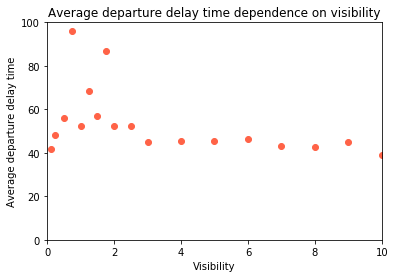

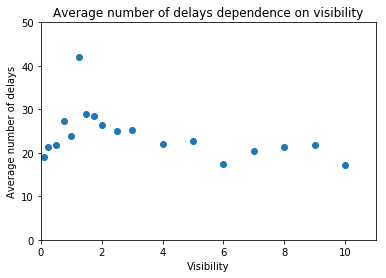

In [40]:
#Average departure delays dependence on visibility
dep_on_visib = flights_weather_merged.groupby([flights_weather_merged.visib])['average_delay_time', 'counts'].agg([np.mean]).reset_index()
#print(dep_on_visib)

plt.scatter(dep_on_visib.visib, dep_on_visib.average_delay_time, c = "tomato")
plt.xlim(0, 10)
plt.ylim(0, 100)
plt.ylabel('Average departure delay time')
plt.xlabel('Visibility')
plt.title('Average departure delay time dependence on visibility')
plt.show()

plt.scatter(dep_on_visib.visib, dep_on_visib.counts)
plt.xlim(0, 11)
plt.ylim(0, 50)
plt.ylabel('Average number of delays')
plt.xlabel('Visibility')
plt.title('Average number of delays dependence on visibility')
plt.show()

Conclusion 1: better the visibility, less are departure delays and shorter is the average delay time. From the plots we see that flights from NYC slightly depend on visibility.

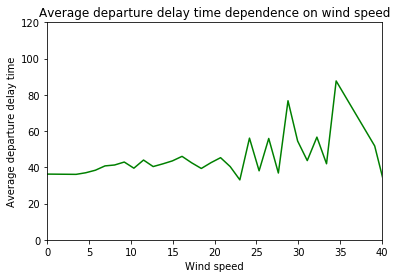

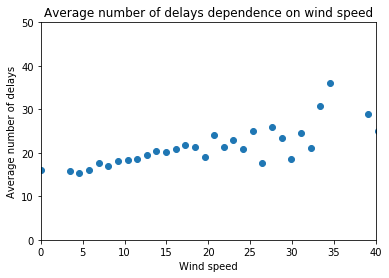

In [45]:
#Average departure delays dependence on wind speed
dep_on_wind = flights_weather_merged.groupby([flights_weather_merged.wind_speed])['average_delay_time', 'counts'].agg([np.mean]).reset_index()
#print(dep_on_wind)


plt.plot(dep_on_wind.wind_speed, dep_on_wind.average_delay_time, c = "green")
plt.xlim(0, 40)
plt.ylim(0, 120)
plt.ylabel('Average departure delay time')
plt.xlabel('Wind speed')
plt.title('Average departure delay time dependence on wind speed')
plt.show()

plt.scatter(dep_on_wind.wind_speed, dep_on_wind.counts)
plt.xlim(0, 40)
plt.ylim(0, 50)
plt.ylabel('Average number of delays')
plt.xlabel('Wind speed')
plt.title('Average number of delays dependence on wind speed')
plt.show()

Conclusion 2: the higher wind speed, the more delays are. It is obvious. 

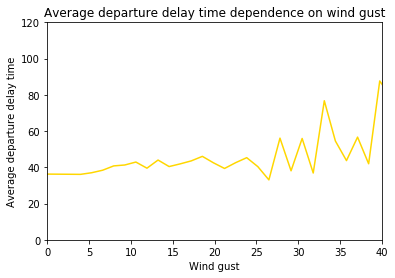

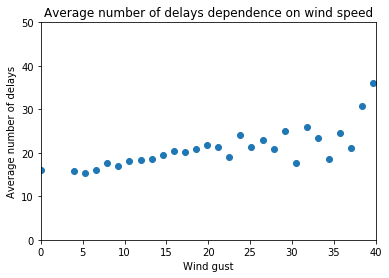

In [66]:
#Average departure delays dependence on wind gust
dep_on_wind = flights_weather_merged.groupby([flights_weather_merged.wind_gust])['average_delay_time', 'counts'].agg([np.mean]).reset_index()
#print(dep_on_wind)

#Plotting the data
plt.plot(dep_on_wind.wind_gust, dep_on_wind.average_delay_time, c = "gold")
plt.xlim(0, 40)
plt.ylim(0, 120)
plt.ylabel('Average departure delay time')
plt.xlabel('Wind gust')
plt.title('Average departure delay time dependence on wind gust')
plt.show()

plt.scatter(dep_on_wind.wind_gust, dep_on_wind.counts)
plt.xlim(0, 40)
plt.ylim(0, 50)
plt.ylabel('Average number of delays')
plt.xlabel('Wind gust')
plt.title('Average number of delays dependence on wind speed')
plt.show()

Conclusion 3: the same picture as with wind speed, because speed and gust are connected. 

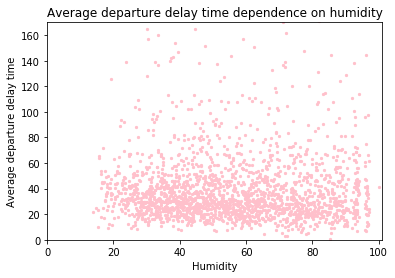

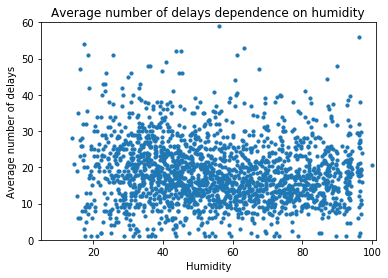

In [63]:
#Average number of delays dependence on humidity
dep_on_humid = flights_weather_merged.groupby([flights_weather_merged.humid])['average_delay_time', 'counts'].agg([np.mean]).reset_index()
#print(dep_on_humid)

plt.scatter(dep_on_humid.humid, dep_on_humid.average_delay_time, c = "pink", s = 5)
plt.xlim(0, 101)
plt.ylim(0, 170)
plt.ylabel('Average departure delay time')
plt.xlabel('Humidity')
plt.title('Average departure delay time dependence on humidity')
plt.show()

plt.scatter(dep_on_humid.humid, dep_on_humid.counts, s = 10)
plt.xlim(5, 101)
plt.ylim(0, 60)
plt.ylabel('Average number of delays')
plt.xlabel('Humidity')
plt.title('Average number of delays dependence on humidity')
plt.show()

Conclusion 4: the mean of delays does not depend on humidity. From the scales the mean values of delays are mostly in a determined stripe And sometimes we see deflections which are not connected with humidity.

In [78]:
# the worst day to fly from NYC
flights_delayed = flights[(flights.dep_delay > 0)]
#flights_day_month = pd.DataFrame(flights_delayed.groupby([flights_delayed.month, flights_delayed.day])['dep_delay'].agg([np.mean()]))
flights_day_month = flights_delayed.groupby([flights_delayed.month, flights_delayed.day]).mean().reset_index()
print(flights_day_month[flights_day_month.dep_delay == max(flights_day_month.dep_delay)])

    month  day     Unnamed: 0    year     dep_time   dep_delay     arr_time  \
66      3    8  143213.777948  2013.0  1502.488515  102.903522  1541.917305   

     arr_delay       flight    air_time     distance       hour     minute  
66  101.607963  1687.222052  150.228178  1081.352221  14.738132  28.675345  


Conclusion 5: the most departure delay time was on the 8th of March, so we can derive that a lot of delays are during holidays and weekends because of the passengers traffic. 

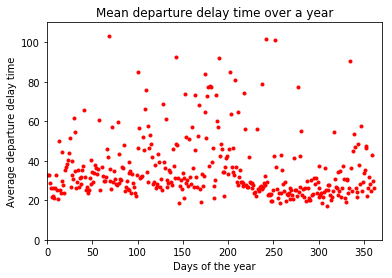

In [119]:
#Mean departure delay time over a year
plt.scatter(flights_day_month.day + (flights_day_month.month - 1) * 30, flights_day_month.dep_delay, c = "red", s = 9)
plt.xlim(0, 370)
plt.ylim(0, 110)
plt.ylabel('Average departure delay time')
plt.xlabel('Days of the year')
plt.title('Mean departure delay time over a year')
plt.show()

Conclusion 6: if we look at the scale above we will not get the answer if there are any seasonal patterns because of big data. So we need to calculate the mean per month.

    month  average_delay_time
0       1           35.335334
1       2           35.299540
2       3           39.616380
3       4           44.185241
4       5           39.245151
5       6           49.790913
6       7           48.807822
7       8           37.274311
8       9           35.676775
9      10           31.560651
10     11           28.707246
11     12           37.203469


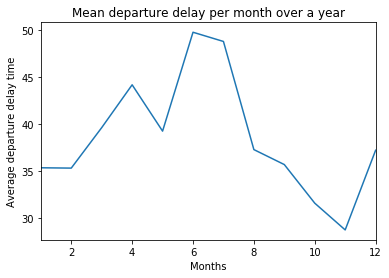

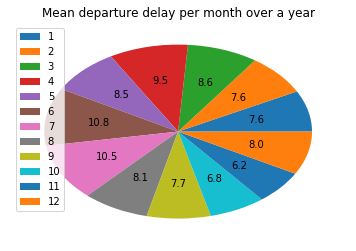

In [98]:
#Mean departure delay time per month over a year
flights_month = flights_delayed.groupby([flights_delayed.month])['dep_delay'].mean().reset_index(name='average_delay_time')
print(flights_month)

plt.plot(flights_month.month, flights_month.average_delay_time)
plt.xlim(1, 12)
plt.xlabel('Months')
plt.ylabel('Average departure delay time')
plt.title('Mean departure delay per month over a year')
plt.show()

plt.pie(flights_month.average_delay_time ,autopct='%.1f')
plt.legend(labels = flights_month.month)
plt.title('Mean departure delay per month over a year')
plt.show()

Conclusion 7: the highest means are from April to July. We suppose that in the hot seasons more flights are delayed because of passengers traffic, as lots of people travel during their holidays.

    hour  average_delay_time
0    0.0          128.642452
1    1.0          207.049327
2    2.0          239.921875
3    3.0          304.727273
4    5.0            6.592391
5    6.0           11.272904
6    7.0           17.932435
7    8.0           19.484653
8    9.0           26.300290
9   10.0           27.960072
10  11.0           31.883025
11  12.0           29.784933
12  13.0           28.628948
13  14.0           29.296095
14  15.0           27.906983
15  16.0           33.224913
16  17.0           35.912961
17  18.0           43.505234
18  19.0           44.520623
19  20.0           54.294921
20  21.0           64.210371
21  22.0           92.465274
22  23.0          125.344743
23  24.0           64.862069


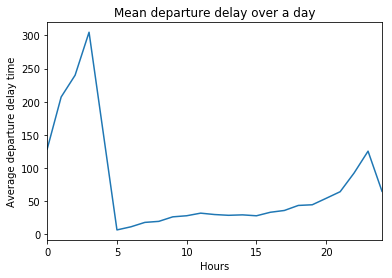

In [101]:
flights_hour = flights_delayed.groupby([flights_delayed.hour])['dep_delay'].mean().reset_index(name='average_delay_time')
print(flights_hour)

plt.plot(flights_hour.hour, flights_hour.average_delay_time)
plt.xlim(0, 24)
plt.xlabel('Hours')
plt.ylabel('Average departure delay time')
plt.title('Mean departure delay over a day')
plt.show()

Conclusion 8: In the period from 0 A.M. to 5 A.M. there are strongly more delays than in other time of the day. We suppose the reason is the biggest number of flights during this period.

   carrier  counts
11      UA   27261


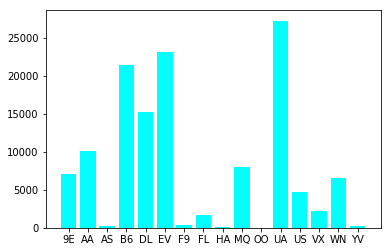

In [109]:
flights_carrier = flights_delayed.groupby([flights_delayed.carrier]).size().reset_index(name='counts')
#print(flights_carrier)
print(flights_carrier[flights_carrier.counts == max(flights_carrier.counts)])

plt.bar(flights_carrier.carrier, flights_carrier.counts, color = "cyan")
plt.show()

Conclusion 9: the bottom carrier is UA. May be there are a lot of races by this carrier or it has a bad reputation and more often has delays than others.

Conclusion 10: the avia communication is a difficult system depending on lots of conditions such as weather, season, holidays, 